In [1]:
from my_set_up import *
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import time
import pandas as pd
import itertools
# import spam_lists
from ast import literal_eval
import ast
import math
import re

import matplotlib.pyplot as plt

from difflib import SequenceMatcher
from collections import Counter
import collections

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

print('done')

done


In [45]:
import ast
from typing import List
from os import listdir
def get_streamings(path: str = 'MyData') -> List[dict]:
    
    files = ['MyData/' + x for x in listdir(path)
             if x.split('.')[0][:-1] == 'StreamingHistory']
    
    all_streamings = []
    
    for file in files: 
        with open(file, 'r', encoding='UTF-8') as f:
            new_streamings = ast.literal_eval(f.read())
            all_streamings += [streaming for streaming 
                               in new_streamings]
    return all_streamings

In [103]:
stream0 = get_streamings()
print('first track \n:',stream0[0],'\n')

df = pd.DataFrame()
df = df.append(stream0, ignore_index=True, sort=False)

df['end_date'] = df['endTime'].astype('datetime64[D]')
df = df[df['end_date'] >= '2021-04-13']
df = df[~df['artistName'].str.contains('The Joe Rogan Experience')]
df['seconds_played'] = df['msPlayed'] / 1000
df['minutes_played'] = df['seconds_played'] / 60
df['hours_played'] = df['minutes_played'] / 60

df_minutes = df.groupby(['artistName','end_date'])['minutes_played']\
.agg('sum')\
.reset_index()\
.sort_values(by='minutes_played',ascending=False)

df_hours = df.groupby(['artistName','end_date'])['hours_played']\
.agg('sum')\
.reset_index()\
.sort_values(by='hours_played',ascending=False)

# df_minutes = df_minutes[df_minutes['end_date'] >= '2022-01-01']
print('first date: \n',df_minutes['end_date'].min(),'\n')
print('total days: \n',df_minutes['end_date'].nunique(),'\n')
print('df shape: \n',df_minutes.shape,'\n')

display('original df:',df.head())
display('df_minutes:',df_minutes.head())

first track 
: {'endTime': '2020-11-28 22:40', 'artistName': 'Lost Kings', 'trackName': "Oops (I'm Sorry) - KC Lights Remix", 'msPlayed': 143609} 

first date: 
 2021-04-13 00:00:00 

total days: 
 317 

df shape: 
 (11214, 3) 



'original df:'

,endTime,artistName,trackName,msPlayed,end_date,seconds_played,minutes_played,hours_played
3,2021-04-13 00:02,Curtis Grimes,River Road Dream,203418,2021-04-13,203.42,3.39,0.06
4,2021-04-13 00:06,Luke Combs,Six Feet Apart,199068,2021-04-13,199.07,3.32,0.06
5,2021-04-13 00:10,Jason Eady,Wishful Drinking,256013,2021-04-13,256.01,4.27,0.07
6,2021-04-13 00:13,Dalton Mauldin,Nights Without You,157750,2021-04-13,157.75,2.63,0.04
7,2021-04-13 00:16,Brandi Carlile,The Eye,211674,2021-04-13,211.67,3.53,0.06


'df_minutes:'

,artistName,end_date,minutes_played
5549,Juan Luis Guerra 4.40,2022-02-16,308.04
6854,Mac Miller,2021-06-12,262.44
6616,Ludwig van Beethoven,2022-03-02,206.40
10606,Tyler Childers,2022-02-17,157.00
2004,Cody Johnson,2021-04-15,151.65


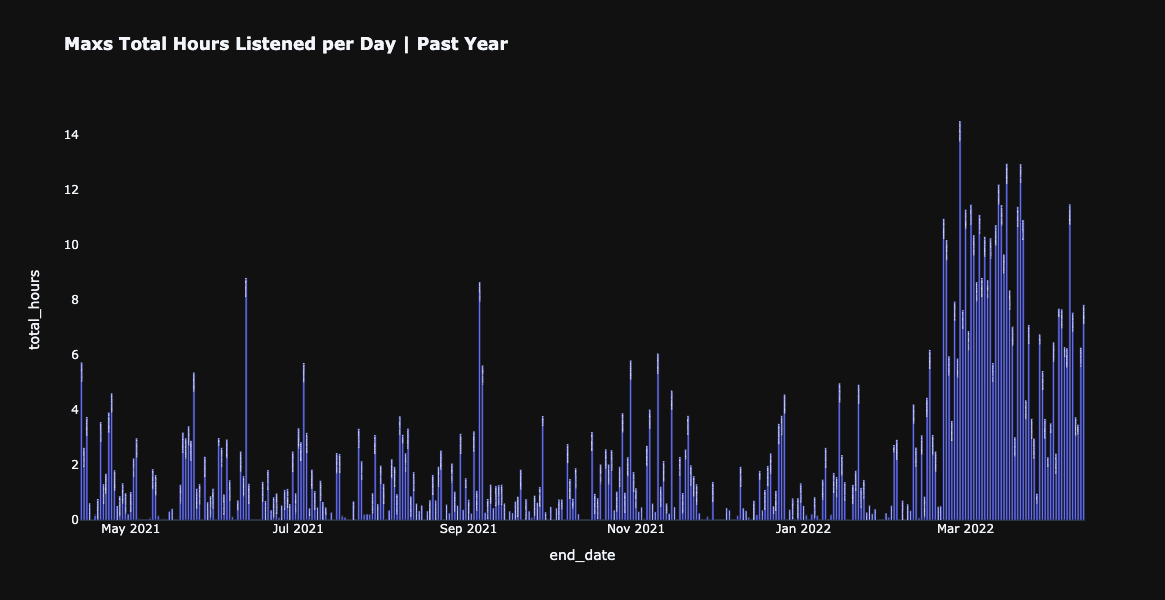

In [104]:
hours_grouped = df_hours.groupby('end_date')['hours_played'].agg('sum').reset_index()
hours_grouped.columns = ['end_date','total_hours']
fig = px.bar(hours_grouped
             ,x='end_date'
             ,y='total_hours'
             ,text='total_hours'
             ,template='plotly_dark'
             ,height=600
             ,title='<b> Maxs Total Hours Listened per Day | Past Year'
            )
fig.update_xaxes(
    showgrid=False
)
fig.update_yaxes(
    showgrid=False
)
fig.show()

total unique artists:  163


'top artists: \n'

,artistName,total_hours
565,Cody Johnson,19.26
1098,HARDY,17.49
1755,Luke Combs,15.25
1970,Morgan Wallen,14.65
1449,Josh Turner,12.99
963,Florida Georgia Line,7.36
2166,Parker McCollum,6.90
2218,Piano Cat,6.33
1417,Jon Pardi,6.29
1437,Josh Abbott Band,5.85


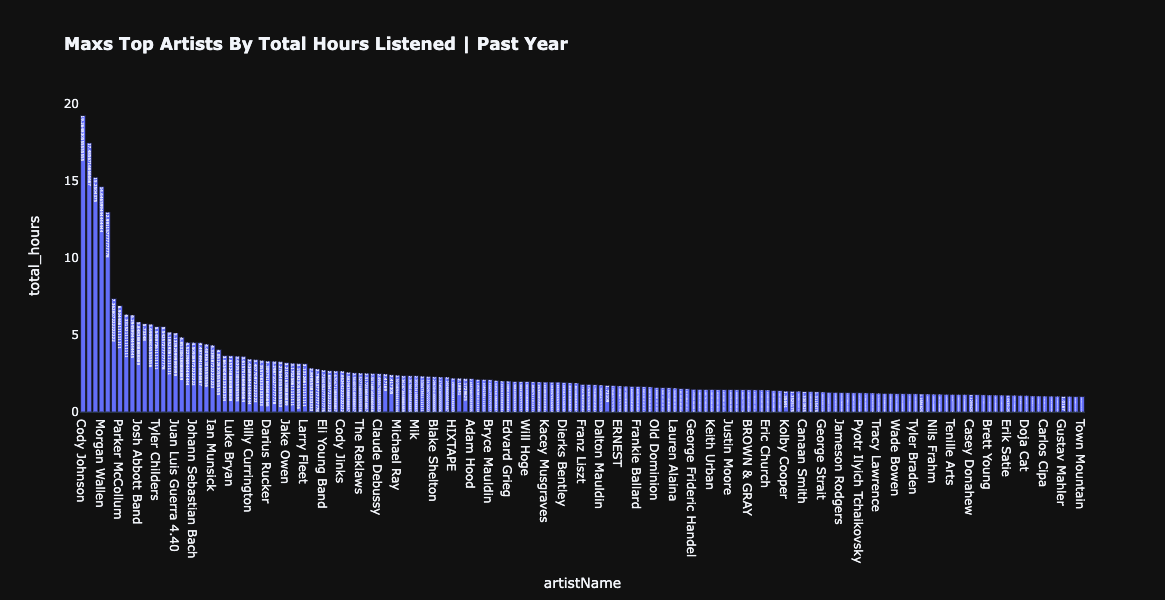

In [105]:
artists_grouped = df.groupby('artistName')['hours_played'].agg('sum').reset_index()
artists_grouped.columns = ['artistName','total_hours']
artists_grouped = artists_grouped[artists_grouped['total_hours'] > 1].sort_values(by='total_hours',ascending=False)

fig = px.bar(artists_grouped
             ,x='artistName'
             ,y='total_hours'
             ,text='total_hours'
             ,template='plotly_dark'
             ,height=600
             ,title='<b> Maxs Top Artists By Total Hours Listened | Past Year'
            )
fig.update_xaxes(
    showgrid=False
)
fig.update_yaxes(
    showgrid=False
)

print('total unique artists: ', artists_grouped.artistName.nunique())
display('top artists: \n',artists_grouped.head(10))
fig.show()

In [106]:
songs_grouped = df.groupby(['artistName','trackName'])['hours_played'].agg('sum').reset_index()
songs_grouped.columns = ['artistName','trackName','total_hours']
songs_grouped = songs_grouped[songs_grouped['total_hours'] > 1].sort_values(by='total_hours',ascending=False)
songs_grouped.head(50)

,artistName,trackName,total_hours
2300,HARDY,WHERE TO FIND ME,4.75
1131,Cody Johnson,'Til You Can't,2.76
3488,Larry Fleet,Where I Find God,2.45
4137,Mike Ryan,Can Down,2.37
3012,Josh Turner,Long Black Train,2.26
2298,HARDY,UNAPOLOGETICALLY COUNTRY AS HELL,2.17
3942,Maren Morris,Circles Around This Town,1.99
4104,Michael Ray,Whiskey And Rain,1.96
5276,Seaforth,Good Beer,1.85
4892,Randy Rogers Band,In My Arms Instead,1.77
